In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [3]:
df = pd.read_csv(f"../datasets/normalized/unsupervised_learning/ul_player_final.csv")

In [4]:
df['season'].value_counts()

season
2022/2023    331
2021/2022    214
2020/2021    174
2019/2020    143
2018/2019    116
2017/2018     86
2016/2017     71
2015/2016     57
2014/2015     42
2013/2014     29
2012/2013     21
2011/2012     14
2010/2011     13
2009/2010     11
Name: count, dtype: int64

In [6]:
len(df['player_id'].unique())

301

In [6]:
# It shows that we have different number of player's data in each season.
# This is because that we extracted the player's information from team's site
# where they don't provide the player's stats from the previous teams. 
# To improve the quality of data, more sources of data should be investgated in the following research. 
# But, in football, many players go through hard time when they move to other team.
# So, I decide to use player's stats only from current team. 
# Also, recent form is very important in sports world, I only use recent 3 years of data

df = df[df['season'].isin(['2022/2023', '2021/2022', '2020/2021'])]
df


,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.62,7.75,5.99,6.24,6.18,6.04,6.05,6.57,6.26,6.42
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1317,24248,2022/2023,16(7),1248,1,5,1,1.2,73.5,6.24,...,6.16,6.16,6.17,7.97,6.04,6.78,5.68,6.29,5.99,6.08


<Axes: ylabel='Frequency'>

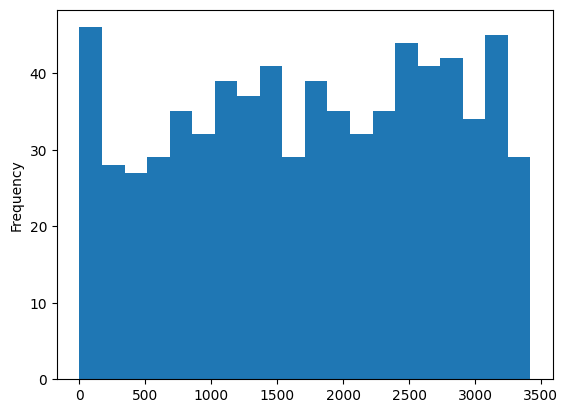

In [7]:
df['mins'].plot(kind='hist', bins=20)

In [8]:
# It does not seem to have a statistical meaning in the data item if a player appears under 300 mins.
# So I will filter the datasets with 300+ mins
df = df[df['mins'] > 300] 
df

,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,337916,2020/2021,30(1),2559,5,4,0,2.0,88.4,7.11,...,6.43,6.07,6.73,6.12,5.98,6.24,6.42,6.12,6.76,5.98
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.62,7.75,5.99,6.24,6.18,6.04,6.05,6.57,6.26,6.42
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24


<Axes: ylabel='Frequency'>

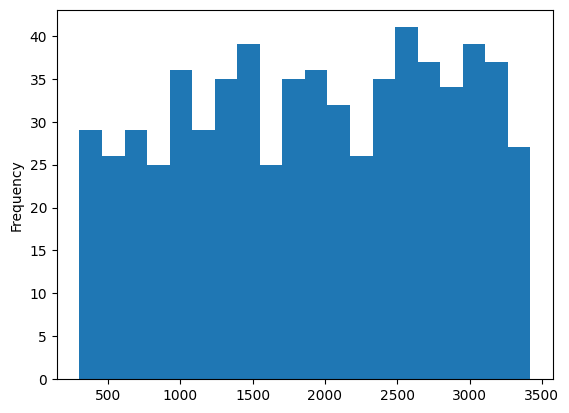

In [9]:
df['mins'].plot(kind='hist', bins=20)

In [10]:
# To check the number of unique player_id and player_name
print(len(pd.unique(df['player_id'])))
print(len(pd.unique(df['Name'])))


284
284


In [11]:
# add new column for recent form
ratings = ['rating_1','rating_2','rating_3','rating_4','rating_5','rating_6','rating_7','rating_8','rating_9','rating_10']

df["avg_rating_10_games"] = df[ratings].mean(axis=1)


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_22290/3669098030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_rating_10_games"] = df[ratings].mean(axis=1)


In [12]:
# to get the goals per 90 mins since if a player appeares more games, it is likely to get a change to make more goals. So if we just use goals as a feature, it can be biased.

df["goals_per_90min"] = (df["goals"]*90)/df["mins"]

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_22290/1204444864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goals_per_90min"] = (df["goals"]*90)/df["mins"]


In [13]:
# add new column - age
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
                                     
df['age'] = df['birth_date'].apply(age)

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_22290/3640521000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['birth_date'].apply(age)


In [14]:
# convert string to numerical value
df['Height'] = df['Height'].str.extract('(\d+)').astype(int)
df

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_22290/3213104882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].str.extract('(\d+)').astype(int)


,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10,avg_rating_10_games,goals_per_90min,age
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.373206,21
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.330441,21
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.175644,21
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,7.45,7.21,6.07,7.53,6.97,6.38,6.56,7.074,0.453401,26
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,7.45,7.21,6.07,7.53,6.97,6.38,6.56,7.074,0.382979,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,337916,2020/2021,30(1),2559,5,4,0,2.0,88.4,7.11,...,6.12,5.98,6.24,6.42,6.12,6.76,5.98,6.285,0.175850,23
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.24,6.18,6.04,6.05,6.57,6.26,6.42,6.412,0.116580,31
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.87,6.29,7.10,6.34,6.07,6.21,7.24,6.542,0.253998,27
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.87,6.29,7.10,6.34,6.07,6.21,7.24,6.542,0.246981,27


In [15]:
# select features
features = ['Current Team', 'overall_ratings', 'avg_rating_10_games', 'goals_per_90min', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass',  'Height',
       'age']

df = df[['Name'] + features]

# groupby to merge datay by a player
agg_d = { c: 'first' if c == 'Current Team' else 'mean' for c in features}
df = df.groupby('Name').agg(agg_d)
df.reset_index(inplace=True)
df['index'] = df.index

In [16]:
df.rename(columns={'Name': 'player_name'}, inplace=True)
df.columns

Index(['player_name', 'Current Team', 'overall_ratings', 'avg_rating_10_games',
       'goals_per_90min', 'yels', 'reds', 'shoots_per_game', 'pass_success',
       'tackles', 'fouls', 'offsides_won', 'clear', 'drb', 'blocks',
       'key_pass', 'drb_won', 'fouls_given', 'offsides_given', 'dispossessed',
       'turnover', 'total_pass', 'crosses', 'long_pass', 'Height', 'age',
       'index'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          284 non-null    object 
 1   Current Team         284 non-null    object 
 2   overall_ratings      284 non-null    float64
 3   avg_rating_10_games  284 non-null    float64
 4   goals_per_90min      284 non-null    float64
 5   yels                 284 non-null    float64
 6   reds                 284 non-null    float64
 7   shoots_per_game      284 non-null    float64
 8   pass_success         284 non-null    float64
 9   tackles              284 non-null    float64
 10  fouls                284 non-null    float64
 11  offsides_won         284 non-null    float64
 12  clear                284 non-null    float64
 13  drb                  284 non-null    float64
 14  blocks               284 non-null    float64
 15  key_pass             284 non-null    flo

In [18]:
def concatenate_csv_files(file_dir_path: str) -> pd.DataFrame:
    csv_files = glob.glob(f'{file_dir_path}/*.csv')
    return pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [21]:
# concat player's market value data into one dataframe
mk_df = concatenate_csv_files('../datasets/raw/unsupervised_learning/players/transfermarkt.com')
final_df = df.merge(mk_df, on='player_name', how='left')
final_df.drop(['Unnamed: 0'], axis=1, inplace=True)
final_df



,player_name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,tackles,...,dispossessed,turnover,total_pass,crosses,long_pass,Height,age,index,position,market_value
0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,1.500000,...,0.500000,0.600000,28.4,0.200000,1.100000,178.0,20.0,0,Left-Back,18.0
1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,0.033333,...,0.000000,0.033333,27.0,0.000000,5.233333,188.0,25.0,1,Goalkeeper,38.0
2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,1.866667,...,0.700000,1.200000,34.6,0.033333,0.800000,184.0,30.0,2,Central Midfield,12.0
3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,1.650000,...,0.350000,0.800000,26.0,0.150000,1.600000,174.0,31.0,3,Central Midfield,1.8
4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,1.300000,...,0.100000,0.600000,25.8,0.500000,1.600000,180.0,32.0,4,Right-Back,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,0.400000,...,0.450000,1.100000,8.8,0.000000,0.200000,176.0,26.0,279,Left Winger,15.0
280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,2.266667,...,0.766667,1.200000,55.9,0.466667,2.500000,176.0,26.0,280,Central Midfield,30.0
281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,1.100000,...,0.250000,0.100000,28.7,0.150000,1.300000,191.0,33.0,281,Centre-Back,1.5
282,Álex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,1.200000,...,0.800000,2.000000,30.5,0.800000,0.500000,179.0,30.0,282,Left-Back,20.0


<Axes: >

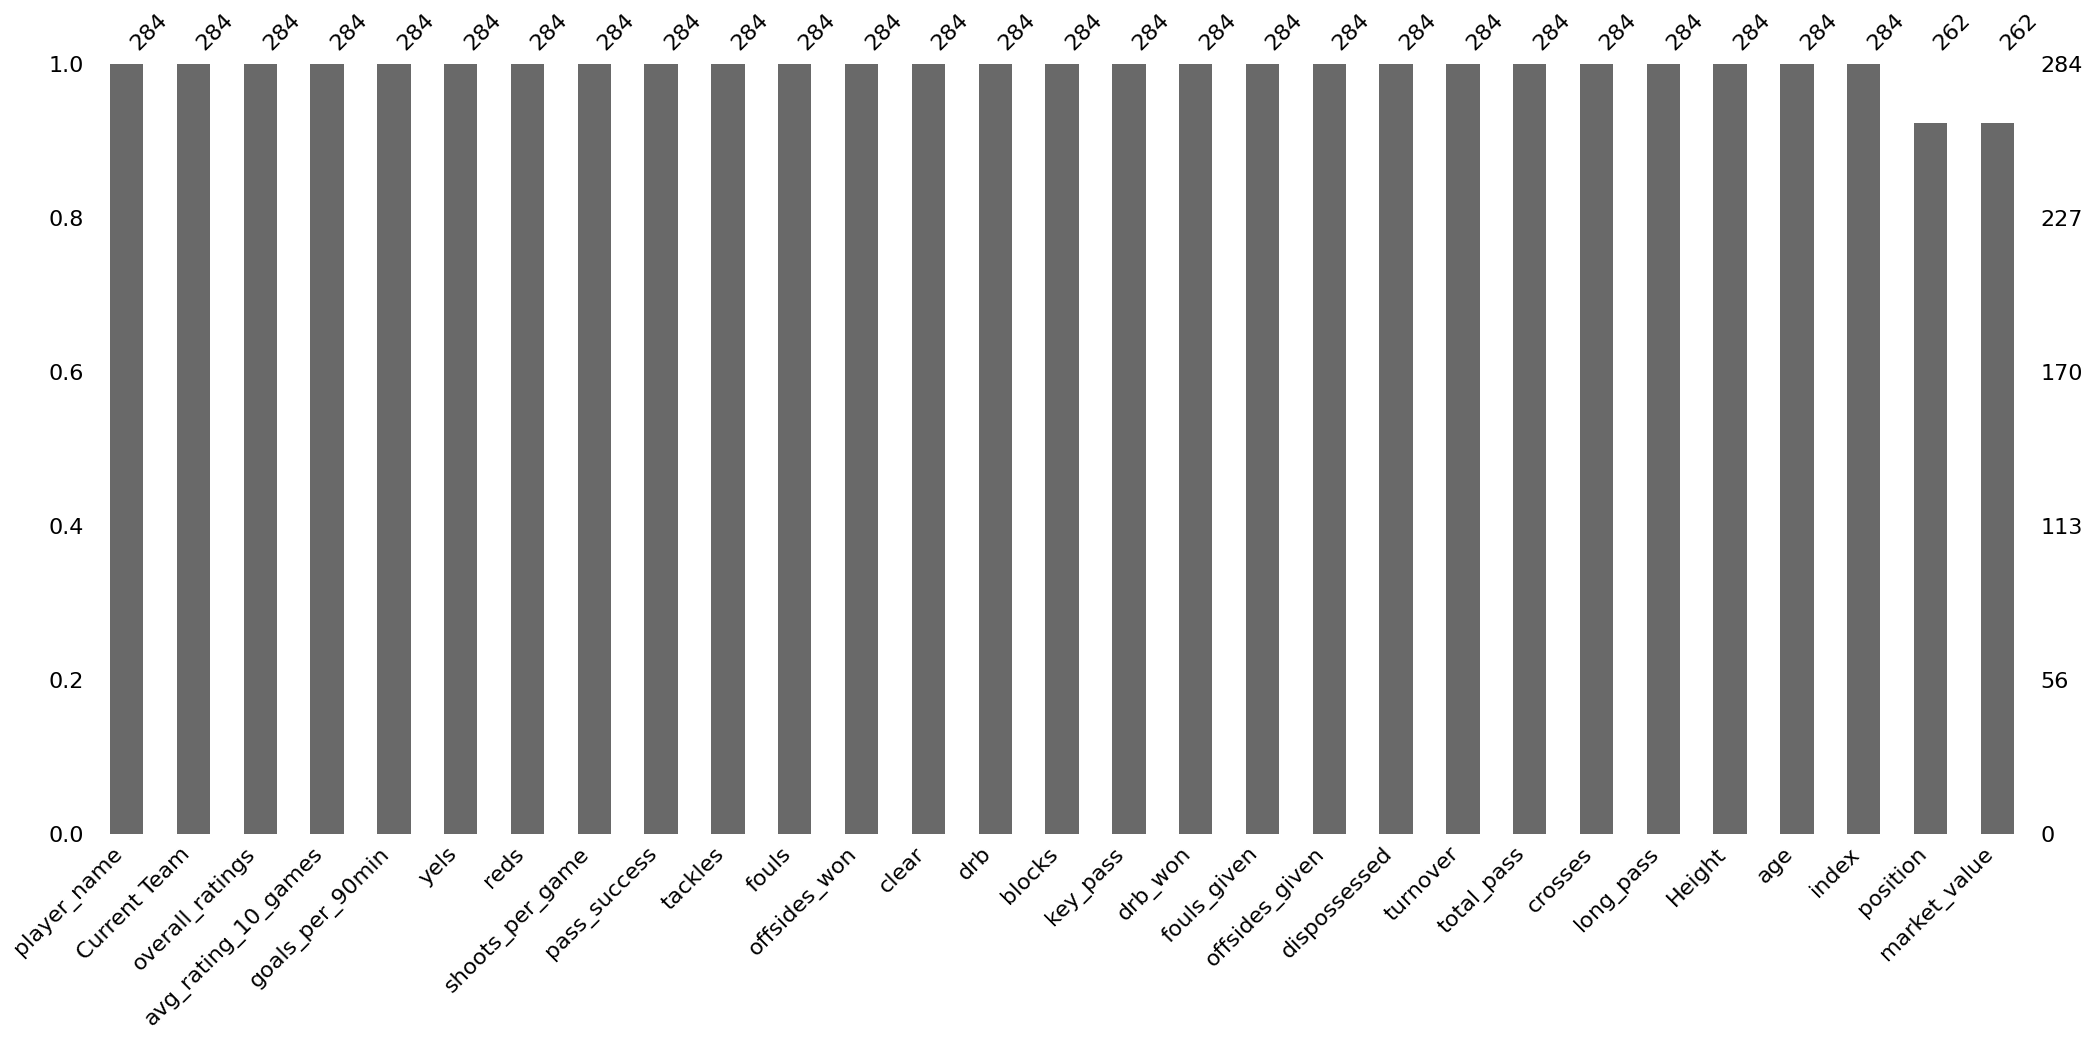

In [22]:
# to check missing values.
msno.bar(final_df)

In [24]:
final_df[final_df['market_value'].isnull()]
# I will add position and market_value manually

,player_name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,tackles,...,dispossessed,turnover,total_pass,crosses,long_pass,Height,age,index,position,market_value
18,Ayoze Pérez,Real Betis,6.500000,6.905,0.180146,0.666667,0.333333,1.000000,77.733333,1.000000,...,1.100000,1.366667,16.166667,0.233333,0.266667,178.0,29.0,18,NaN,NaN
39,Christian Nørgaard,Brentford,6.950000,6.723,0.069541,7.000000,0.000000,0.850000,78.100000,2.750000,...,0.600000,0.650000,41.800000,0.100000,1.750000,187.0,29.0,39,NaN,NaN
60,Dele Alli,Besiktas,6.426667,6.459,0.045593,1.333333,0.000000,0.500000,77.900000,1.066667,...,1.166667,1.200000,19.100000,0.100000,0.400000,188.0,27.0,60,NaN,NaN
63,Diego Llorente,Roma,6.650000,6.567,0.063272,3.000000,0.000000,0.566667,82.700000,1.933333,...,0.233333,0.733333,49.933333,0.000000,2.900000,186.0,29.0,63,NaN,NaN
90,Gonçalo Guedes,Benfica,6.380000,6.431,0.126761,1.000000,0.000000,1.500000,75.000000,0.600000,...,0.500000,1.300000,13.200000,0.500000,0.600000,179.0,26.0,90,NaN,NaN
101,Hwang Hee-Chan,Wolverhampton,6.430000,6.542,0.250490,1.500000,0.000000,0.800000,79.550000,0.850000,...,0.800000,1.250000,15.200000,0.100000,0.450000,177.0,27.0,101,NaN,NaN
139,Josh Onomah,Preston,6.080000,6.346,0.000000,1.000000,0.000000,0.500000,90.000000,1.000000,...,0.800000,0.800000,15.500000,0.000000,0.400000,185.0,26.0,139,NaN,NaN
141,João Cancelo,Bayern Munich,7.256667,7.055,0.082270,5.000000,0.666667,1.533333,86.400000,2.133333,...,0.766667,1.233333,70.866667,0.566667,2.833333,182.0,29.0,141,NaN,NaN
160,Lewis O'Brien,DC United,6.310000,6.795,0.154905,2.000000,0.000000,0.500000,78.700000,1.200000,...,0.500000,0.900000,15.900000,0.000000,0.200000,173.0,24.0,160,NaN,NaN
167,Mads Bech Sørensen,FC Groningen,6.270000,6.102,0.000000,3.000000,0.000000,0.200000,81.400000,0.700000,...,0.000000,0.200000,39.200000,0.300000,1.700000,189.0,24.0,167,NaN,NaN


In [25]:
final_df.to_csv('../datasets/normalized/unsupervised_learning/final_player_dataset.csv')